In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle





In [2]:
 df = pd.read_excel('/content/Mall_Customers.csv.xlsx')

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
print(df.columns)


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0


In [10]:
print("Data after encoding:")
print(df.head())


Data after encoding:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


In [11]:
X = df  # All columns are relevant now
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [12]:
df['Cluster'] = kmeans.labels_

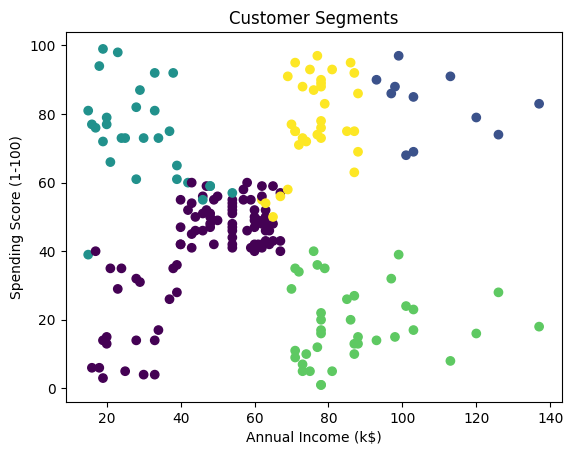

In [13]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()


In [14]:
from sklearn.metrics import silhouette_score

# Inertia
print("Inertia (WCSS):", kmeans.inertia_)

# Silhouette Score
sil_score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", sil_score)

Inertia (WCSS): 97260.4789301898
Silhouette Score: 0.35961309652984097


In [16]:
import os
os.makedirs('model', exist_ok=True)

with open('model/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('model/gender_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✅ Model and encoder saved to 'model/' folder successfully.")

✅ Model and encoder saved to 'model/' folder successfully.
